In [6]:
import os
import zipfile

local_zip = 'Datasets/archive.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('Datasets/archive')
zip_ref.close()

In [19]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('Datasets/archive/horse-or-human/train/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('Datasets/archive/horse-or-human/train/humans')

In [20]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']


In [21]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [22]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows = 8
ncols = 8
pic_index = 0

Now, display a batch of 8 horse and 8 human pictures. You can rerun the cell to see a fresh batch each time:

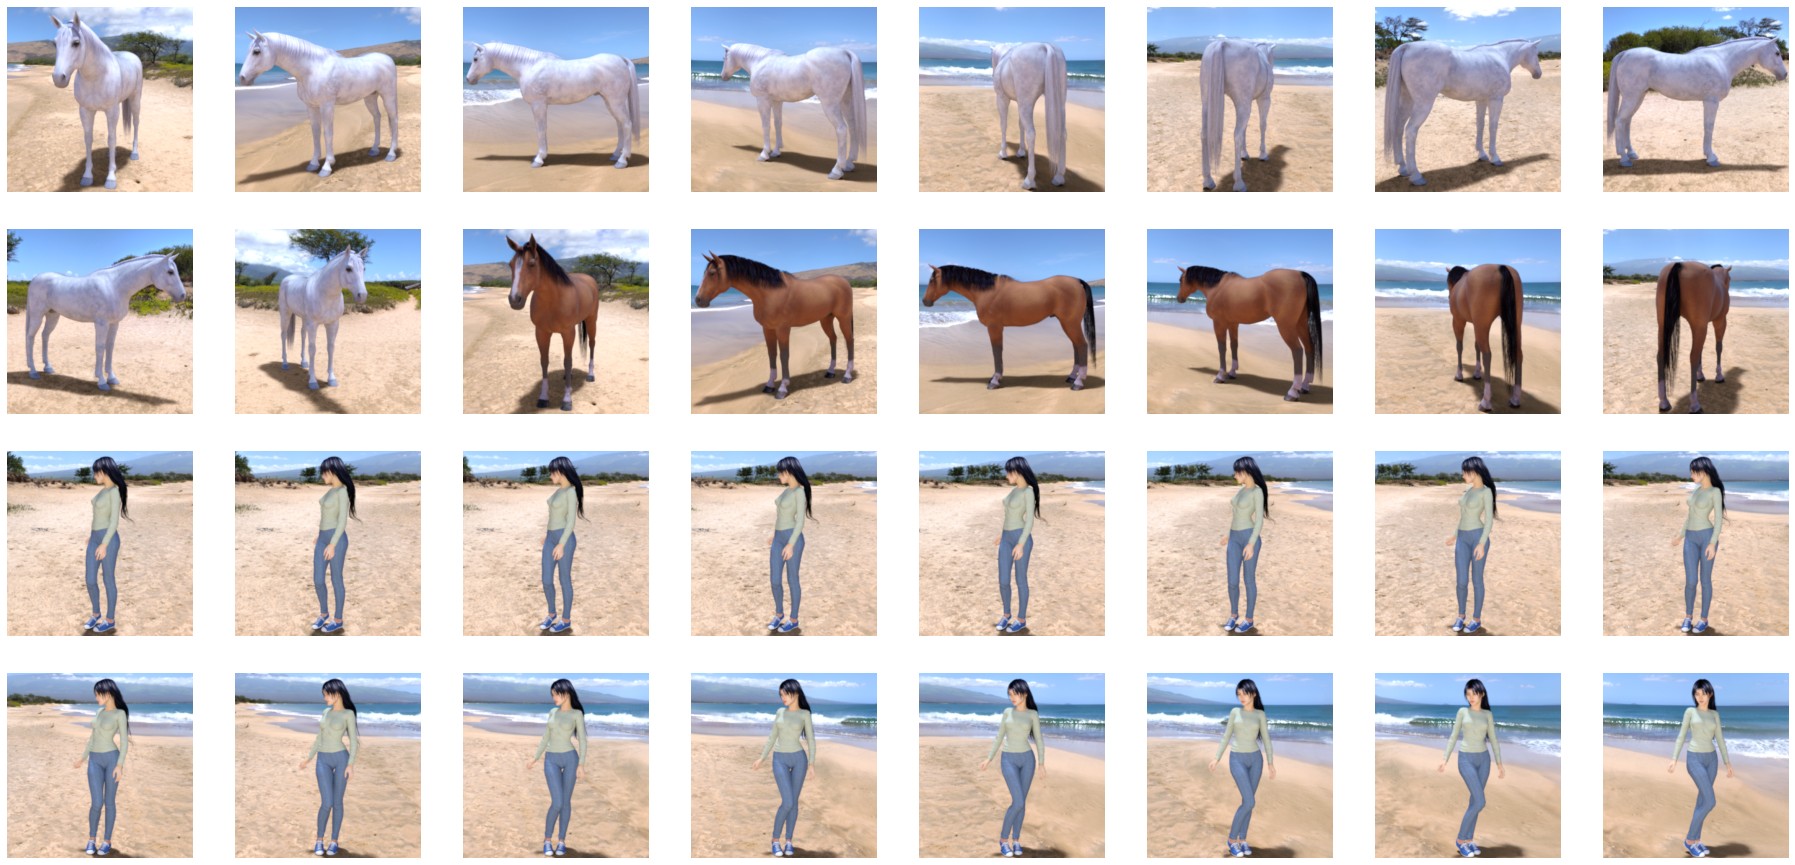

In [23]:

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

# pic_index from 0 to 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index:pic_index+16]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index:pic_index +16]]

for i, img_path in enumerate(next_horse_pix+next_human_pix): #concatenated list paths
  ax = plt.subplot(nrows, ncols, i + 1)
  ax.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [24]:
import tensorflow as tf

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

The model.summary() method call prints a summary of the NN 

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [27]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

D:\anaconda\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        'Datasets/archive/horse-or-human',  
        target_size=(300, 300), 
        batch_size=128,
        class_mode='binary')


Found 1283 images belonging to 2 classes.


In [32]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 45s 5s/step - loss: 0.8614 - accuracy: 0.7881
Epoch 2/15
8/8 [==============================] - 37s 5s/step - loss: 0.6623 - accuracy: 0.7998
Epoch 3/15
8/8 [==============================] - 36s 4s/step - loss: 0.6137 - accuracy: 0.7931
Epoch 4/15
8/8 [==============================] - 34s 4s/step - loss: 0.6175 - accuracy: 0.8398
Epoch 5/15
8/8 [==============================] - 32s 4s/step - loss: 0.4467 - accuracy: 0.8220
Epoch 6/15
8/8 [==============================] - 31s 4s/step - loss: 0.2923 - accuracy: 0.9032
Epoch 7/15
8/8 [==============================] - 38s 5s/step - loss: 0.2409 - accuracy: 0.8916
Epoch 8/15
8/8 [==============================] - 35s 4s/step - loss: 0.1259 - accuracy: 0.9577
Epoch 9/15
8/8 [==============================] - 45s 6s/step - loss: 0.7438 - accuracy: 0.8848
Epoch 10/15
8/8 [==============================] - 40s 5s/step - loss: 0.1639 - accuracy: 0.9473
Epoch 11/15
8/8 [======================

In [35]:
#while using in colab
#import numpy as np
#from google.colab import files
#from keras.preprocessing import image
#
#uploaded = files.upload()
#
#for fn in uploaded.keys():
# 
#  # predicting images
#  path = '/content/' + fn
#  img = image.load_img(path, target_size=(300, 300))
#  x = image.img_to_array(img)
#  x = np.expand_dims(x, axis=0)
#
#  images = np.vstack([x])
#  classes = model.predict(images, batch_size=10)
#  print(classes[0])
#  if classes[0]>0.5:
#    print(fn + " is a human")
#  else:
#    print(fn + " is a horse")
 

D:\anaconda\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


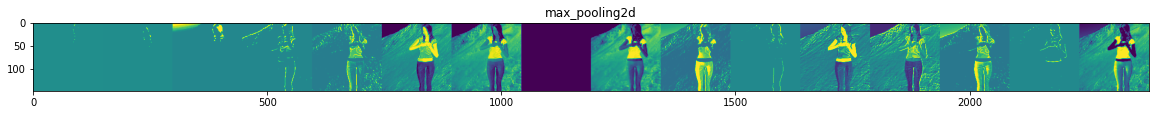

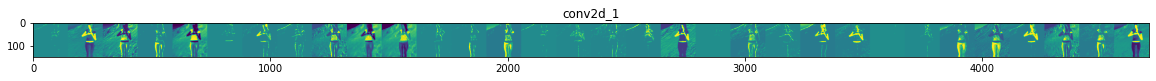

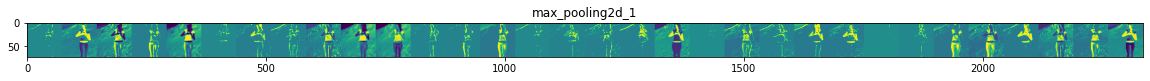

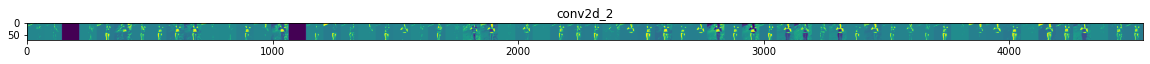

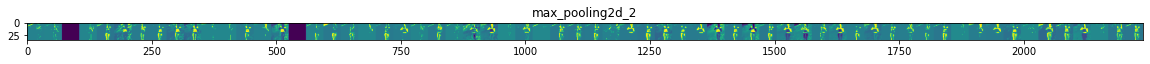

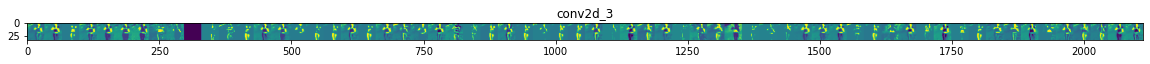

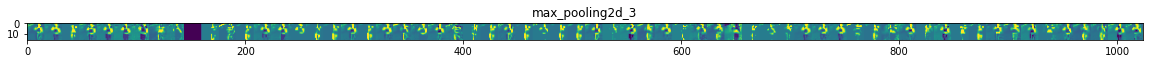

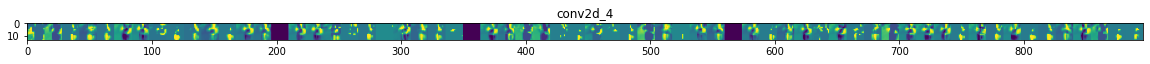

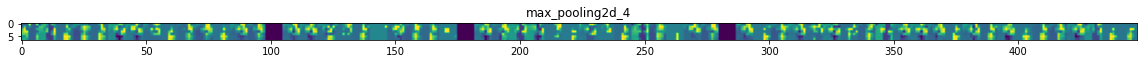

In [36]:
#Visualizing the process
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300)) 
x = img_to_array(img) 
x = x.reshape((1,) + x.shape)  

# Rescale by 1/255
x /= 255
successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers[1:]]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1] 
    size = feature_map.shape[1]

    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')